In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from scipy.optimize      import curve_fit
import os

In [3]:
from IPython.display import IFrame, display
file = 'Lectures/Integracion.pdf'
IFrame(file, width=600, height=400)

In [4]:
def Function(x):
    return np.sin(x)

def ddFunction(f, x, h):
    d = 0.
    if(h != 0):
        d = ( f(x+h) - 2*f(x) + f(x-h) )/h**2
    return d

In [32]:
xi, xf, Npoints = 0, 0.5*np.pi, 10

X = np.linspace(xi, xf, Npoints+1)
Y = Function(X)
DDY = ddFunction(Function, X, 0.001)

#print(X,Y,DDY)

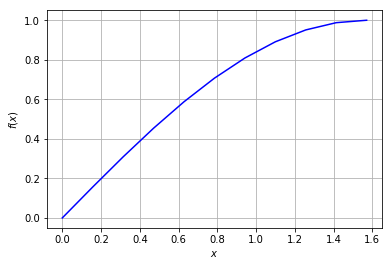

In [33]:
plt.plot(X,Y,'b', label='f(x)')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.show()

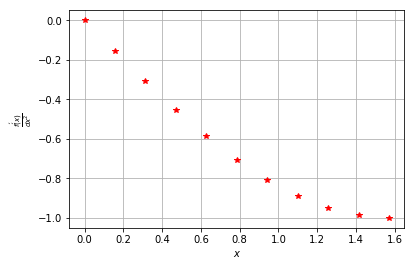

In [34]:
plt.plot(X, DDY, 'r*', label='d2f(x)')
plt.xlabel(r'$x$')
plt.ylabel(r'$\frac{f\'\'(x)}{dx^{2}}$')
plt.grid()
plt.show()

In [35]:
def TrapezeMethod(f, X, Y):
    
    h = (X[-1]-X[0])/(len(X)-1)
    
    integral = 0.
    integral += 0.5*(f(X[0]+f(X[-1])))
     
    for i in X[1:-1]:
        integral += f(i)
        
    integral = h*integral
    
    return integral, h

In [36]:
Integral, step = TrapezeMethod(Function, X, Y)
print(Integral, step)

(0.985492146616649, 0.15707963267948966)


In [45]:
def ErrorTrapezeMethod(X,DDY):
    DDY_ = np.array(DDY)
    mean = np.mean(DDY_)
   # max_ = np.amax(DDY_)
    print(mean)
    
    error = -(( X[-1]-X[0] )**3 * mean)/(12.*len(X)**2)
    return error

In [46]:
Error = ErrorTrapezeMethod(X,DDY)
print(Error)

-0.6230092542742155
0.001662981862294558
